In [1]:
import requests
import pandas as pd

# Definición de los parametros a emplear para extraer los datos.
params = {
    'dataset': 'daily-summaries',
    'startDate': '1957-06-30', # Periodo - Inicio
    'endDate': '2024-07-02', # Periodo - final
    'stations': 'AR000087418',  # Mendoza Aereo
    'format': 'json',
    'includeStationName': 'true',
}

# Dirección web de la cual obtenemos los datos
url = "https://www.ncei.noaa.gov/access/services/data/v1"

# Respuesta de la api de la NCEI
response=requests.get(url,params=params)

# Lectura de la respuesta en formato JSON
if response.status_code==200:
    info=response.json()
else:
    print(f"Estatus data 1:-> {response.status_code}")

#Transformación en dataframe de pandas
data=pd.DataFrame(info)

# guardar datos en csv
data.to_csv("../data/raw/clima_raw.csv")

# Muestra de la base de datos.
data.head()

,DATE,STATION,TAVG,NAME,TMIN,TMAX,PRCP,SNWD
0,1957-06-30,AR000087418,28,"MENDOZA AERO, AR",NaN,NaN,NaN,NaN
1,1957-07-01,AR000087418,35,"MENDOZA AERO, AR",NaN,NaN,NaN,NaN
2,1957-07-02,AR000087418,47,"MENDOZA AERO, AR",NaN,NaN,NaN,NaN
3,1957-07-03,AR000087418,61,"MENDOZA AERO, AR",NaN,NaN,NaN,NaN
4,1957-07-04,AR000087418,73,"MENDOZA AERO, AR",NaN,NaN,NaN,NaN


In [2]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24142 entries, 0 to 24141
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     24142 non-null  object
 1   STATION  24142 non-null  object
 2   TAVG     19786 non-null  object
 3   NAME     24142 non-null  object
 4   TMIN     22535 non-null  object
 5   TMAX     19113 non-null  object
 6   PRCP     9394 non-null   object
 7   SNWD     5 non-null      object
dtypes: object(8)
memory usage: 1.5+ MB


#### **Información del Dataset de Clima Extraido de NCEI:**
- Todos los datos se encuentran en formato object, ya que se tranformó desde una fuente JSON a Pandas, por lo cual se toma las siguientes acciones:
    - Transformar la columna 'DATE' en formato `datetime`
    - Transformar los datos de las columnas 'TAVG', 'TMIN', 'TMAX', 'PRCP' y 'SNWD' en formato numérico `float`

In [2]:
# Transformar datos de la columna 'DATE' en tipo datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Transformar datos de las columnas 'TAVG', 'TMIN', 'TMAX', 'PRCP', 'SNWD' en tipo numérico
numeric_columns = ['TAVG', 'TMIN', 'TMAX', 'PRCP', 'SNWD']
for i in numeric_columns:
    data[i] = data[i].map(lambda x: (float(x)/10))

# Mostrar la información actualizada del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24142 entries, 0 to 24141
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     24142 non-null  datetime64[ns]
 1   STATION  24142 non-null  object        
 2   TAVG     19786 non-null  float64       
 3   NAME     24142 non-null  object        
 4   TMIN     22535 non-null  float64       
 5   TMAX     19113 non-null  float64       
 6   PRCP     9394 non-null   float64       
 7   SNWD     5 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.5+ MB


#### Dataset:
- Para obtener mayor información de los datos extraidos se dividirá el dataset en dos dataset distintos tomando en cuenta la eliminación de los NaN.

In [3]:
# Cambiar la posición de las columnas del dataset
data = data[['NAME', 'STATION', 'DATE', 'TMIN', 'TMAX', 'TAVG', 'PRCP', 'SNWD']]

# Información del dataset actualizado
data.head()

,NAME,STATION,DATE,TMIN,TMAX,TAVG,PRCP,SNWD
0,"MENDOZA AERO, AR",AR000087418,1957-06-30,NaN,NaN,2.8,NaN,NaN
1,"MENDOZA AERO, AR",AR000087418,1957-07-01,NaN,NaN,3.5,NaN,NaN
2,"MENDOZA AERO, AR",AR000087418,1957-07-02,NaN,NaN,4.7,NaN,NaN
3,"MENDOZA AERO, AR",AR000087418,1957-07-03,NaN,NaN,6.1,NaN,NaN
4,"MENDOZA AERO, AR",AR000087418,1957-07-04,NaN,NaN,7.3,NaN,NaN


#### Información del dataset NaN:
- La información de las columnas 'NAME' y 'STATION' se repite por lo que no tienen un aporte significativo en el estudio, además se conoce que la data extraida es de la Provincia de Mendoza en Argentina y es tomada de la estación del aeropuert, por lo que se eliminan las columnas 'NAME' y 'STATION'.
- Se separan los datos de las fechas en la columna 'DATE', para tener datos de Año, Mes y Día.

In [11]:
# Dataset eliminando NaN
no_nan_data = data[["DATE",	"TMIN", "TMAX", "TAVG", "PRCP", "SNWD"]]

# Mostrar el dataset
no_nan_data.head()

,DATE,TMIN,TMAX,TAVG,PRCP,SNWD
0,1957-06-30,NaN,NaN,2.8,NaN,NaN
1,1957-07-01,NaN,NaN,3.5,NaN,NaN
2,1957-07-02,NaN,NaN,4.7,NaN,NaN
3,1957-07-03,NaN,NaN,6.1,NaN,NaN
4,1957-07-04,NaN,NaN,7.3,NaN,NaN


In [12]:
# Información del dataset no_nan_data
no_nan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24142 entries, 0 to 24141
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    24142 non-null  datetime64[ns]
 1   TMIN    22535 non-null  float64       
 2   TMAX    19113 non-null  float64       
 3   TAVG    19786 non-null  float64       
 4   PRCP    9394 non-null   float64       
 5   SNWD    5 non-null      float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.1 MB


#### Decición con los datos NaN:
- Se decide eliminar la columna 'SNWD' debido a que la mayo parte de sus valores son NaN (99,98%).
- Se eliminan las filas con NaN para solo tomar en cuenta los datos completos

In [13]:
# Eliminar las columna 'SNWD'
no_nan_data.drop(['SNWD'], axis=1, inplace=True)

# Eliminar demás datos NaN
no_nan_data = no_nan_data.dropna()

# Mostrar los datos restantes
no_nan_data.head()

,DATE,TMIN,TMAX,TAVG,PRCP
2643,1965-08-13,9.8,20.5,13.5,0.3
3348,1967-07-19,1.6,11.0,7.1,0.5
3387,1967-08-27,2.0,19.4,9.8,0.5
3388,1967-08-28,2.1,20.7,8.1,0.0
3395,1967-09-04,4.8,9.4,6.8,1.0


In [14]:
# Desglozamos la columna DATE para tener una mejor perspectiva predictiva
no_nan_data['year'] = no_nan_data['DATE'].dt.year
no_nan_data['month'] = no_nan_data['DATE'].dt.month
no_nan_data['day'] = no_nan_data['DATE'].dt.day

# Cambiamos la posición de las columnas
no_nan_data = no_nan_data[["DATE", "year", "month", "day", "TMIN", "TMAX", "TAVG", "PRCP"]]

# Información del dataset
no_nan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8200 entries, 2643 to 24134
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    8200 non-null   datetime64[ns]
 1   year    8200 non-null   int32         
 2   month   8200 non-null   int32         
 3   day     8200 non-null   int32         
 4   TMIN    8200 non-null   float64       
 5   TMAX    8200 non-null   float64       
 6   TAVG    8200 non-null   float64       
 7   PRCP    8200 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(3)
memory usage: 480.5 KB


In [17]:
# Cambiar los nombres de las columnas
no_nan_data.rename(columns={'DATE':'date', 'TMIN':'tmin(°C)', 'TMAX':'tmax(°C)', 'TAVG':'tavg(°C)', 'PRCP':'precipitaciones(mm)'}, inplace=True)

# Guardar y mostrar los cambios
no_nan_data.to_csv("../data/processed/preprocessed_clima_non_nan.csv")
no_nan_data.head()

,date,year,month,day,tmin(°C),tmax(°C),tavg(°C),precipitaciones(mm)
2643,1965-08-13,1965,8,13,9.8,20.5,13.5,0.3
3348,1967-07-19,1967,7,19,1.6,11.0,7.1,0.5
3387,1967-08-27,1967,8,27,2.0,19.4,9.8,0.5
3388,1967-08-28,1967,8,28,2.1,20.7,8.1,0.0
3395,1967-09-04,1967,9,4,4.8,9.4,6.8,1.0


In [4]:

a = round(data['TAVG'].mean() - data['TMIN'].mean())
b = round(data['TMAX'].mean() - data['TAVG'].mean())
c = round(data['TMAX'].mean() - data['TMIN'].mean())

for index, row in data.iterrows():
    if not pd.isna(row['TAVG']) and pd.isna(row['TMIN']) and pd.isna(row['TMAX']):
        data.at[index, 'TMIN'] = row['TAVG'] - a
        data.at[index, 'TMAX'] = row['TAVG'] + b
    elif pd.isna(row['TAVG']) and not pd.isna(row['TMIN']) and pd.isna(row['TMAX']):
        data.at[index, 'TAVG'] = row['TMIN'] + a
        data.at[index, 'TMAX'] = row['TMIN'] + c
    elif pd.isna(row['TAVG']) and pd.isna(row['TMIN']) and not pd.isna(row['TMAX']):
        data.at[index, 'TAVG'] = row['TMAX'] - b
        data.at[index, 'TMIN'] = row['TMAX'] - c
    elif pd.isna(row['TAVG']) and not pd.isna(row['TMIN']) and not pd.isna(row['TMAX']):
        data.at[index, 'TAVG'] = (row['TMIN'] + row['TMAX']) / 2
    elif not pd.isna(row['TAVG']) and not pd.isna(row['TMIN']) and pd.isna(row['TMAX']):
        data.at[index, 'TMAX'] = 2 * row['TAVG'] - row['TMIN']
    elif not pd.isna(row['TAVG']) and pd.isna(row['TMIN']) and not pd.isna(row['TMAX']):
        data.at[index, 'TMIN'] = 2 * row['TAVG'] - row['TMAX']

data

,DATE,STATION,TAVG,NAME,TMIN,TMAX,PRCP,SNWD
0,1957-06-30,AR000087418,2.8,"MENDOZA AERO, AR",-4.2,9.8,NaN,NaN
1,1957-07-01,AR000087418,3.5,"MENDOZA AERO, AR",-3.5,10.5,NaN,NaN
2,1957-07-02,AR000087418,4.7,"MENDOZA AERO, AR",-2.3,11.7,NaN,NaN
3,1957-07-03,AR000087418,6.1,"MENDOZA AERO, AR",-0.9,13.1,NaN,NaN
4,1957-07-04,AR000087418,7.3,"MENDOZA AERO, AR",0.3,14.3,NaN,NaN
...,...,...,...,...,...,...,...,...
24137,2024-06-28,AR000087418,9.0,"MENDOZA AERO, AR",1.3,15.0,NaN,NaN
24138,2024-06-29,AR000087418,5.4,"MENDOZA AERO, AR",-2.0,12.8,NaN,NaN
24139,2024-06-30,AR000087418,6.8,"MENDOZA AERO, AR",-0.2,13.8,NaN,NaN
24140,2024-07-01,AR000087418,9.9,"MENDOZA AERO, AR",-1.6,21.4,NaN,NaN


In [5]:
cols = ['PRCP', 'SNWD']

for col in cols:
    data[col] = data[col].fillna(0)

data

,DATE,STATION,TAVG,NAME,TMIN,TMAX,PRCP,SNWD
0,1957-06-30,AR000087418,2.8,"MENDOZA AERO, AR",-4.2,9.8,0.0,0.0
1,1957-07-01,AR000087418,3.5,"MENDOZA AERO, AR",-3.5,10.5,0.0,0.0
2,1957-07-02,AR000087418,4.7,"MENDOZA AERO, AR",-2.3,11.7,0.0,0.0
3,1957-07-03,AR000087418,6.1,"MENDOZA AERO, AR",-0.9,13.1,0.0,0.0
4,1957-07-04,AR000087418,7.3,"MENDOZA AERO, AR",0.3,14.3,0.0,0.0
...,...,...,...,...,...,...,...,...
24137,2024-06-28,AR000087418,9.0,"MENDOZA AERO, AR",1.3,15.0,0.0,0.0
24138,2024-06-29,AR000087418,5.4,"MENDOZA AERO, AR",-2.0,12.8,0.0,0.0
24139,2024-06-30,AR000087418,6.8,"MENDOZA AERO, AR",-0.2,13.8,0.0,0.0
24140,2024-07-01,AR000087418,9.9,"MENDOZA AERO, AR",-1.6,21.4,0.0,0.0


In [6]:
data.describe()

,DATE,TAVG,TMIN,TMAX,PRCP,SNWD
count,24142,24142.000000,24142.000000,24142.000000,24142.000000,24142.000000
mean,1991-05-31 04:46:32.676663168,17.337605,10.444425,24.506383,0.460335,0.000712
min,1957-06-30 00:00:00,-0.500000,-8.700000,1.100000,0.000000,0.000000
25%,1974-11-26 06:00:00,11.600000,4.700000,18.800000,0.000000,0.000000
50%,1991-06-07 12:00:00,17.600000,10.600000,24.900000,0.000000,0.000000
75%,2007-12-15 18:00:00,23.200000,16.300000,30.500000,0.000000,0.000000
max,2024-07-02 00:00:00,58.550000,90.100000,44.400000,305.100000,6.100000
std,NaN,6.870810,7.046768,7.341887,4.039972,0.055815


In [7]:
data['año'] = data['DATE'].dt.year
data['mes'] = data['DATE'].dt.month
data['día'] = data['DATE'].dt.day

data

,DATE,STATION,TAVG,NAME,TMIN,TMAX,PRCP,SNWD,año,mes,día
0,1957-06-30,AR000087418,2.8,"MENDOZA AERO, AR",-4.2,9.8,0.0,0.0,1957,6,30
1,1957-07-01,AR000087418,3.5,"MENDOZA AERO, AR",-3.5,10.5,0.0,0.0,1957,7,1
2,1957-07-02,AR000087418,4.7,"MENDOZA AERO, AR",-2.3,11.7,0.0,0.0,1957,7,2
3,1957-07-03,AR000087418,6.1,"MENDOZA AERO, AR",-0.9,13.1,0.0,0.0,1957,7,3
4,1957-07-04,AR000087418,7.3,"MENDOZA AERO, AR",0.3,14.3,0.0,0.0,1957,7,4
...,...,...,...,...,...,...,...,...,...,...,...
24137,2024-06-28,AR000087418,9.0,"MENDOZA AERO, AR",1.3,15.0,0.0,0.0,2024,6,28
24138,2024-06-29,AR000087418,5.4,"MENDOZA AERO, AR",-2.0,12.8,0.0,0.0,2024,6,29
24139,2024-06-30,AR000087418,6.8,"MENDOZA AERO, AR",-0.2,13.8,0.0,0.0,2024,6,30
24140,2024-07-01,AR000087418,9.9,"MENDOZA AERO, AR",-1.6,21.4,0.0,0.0,2024,7,1


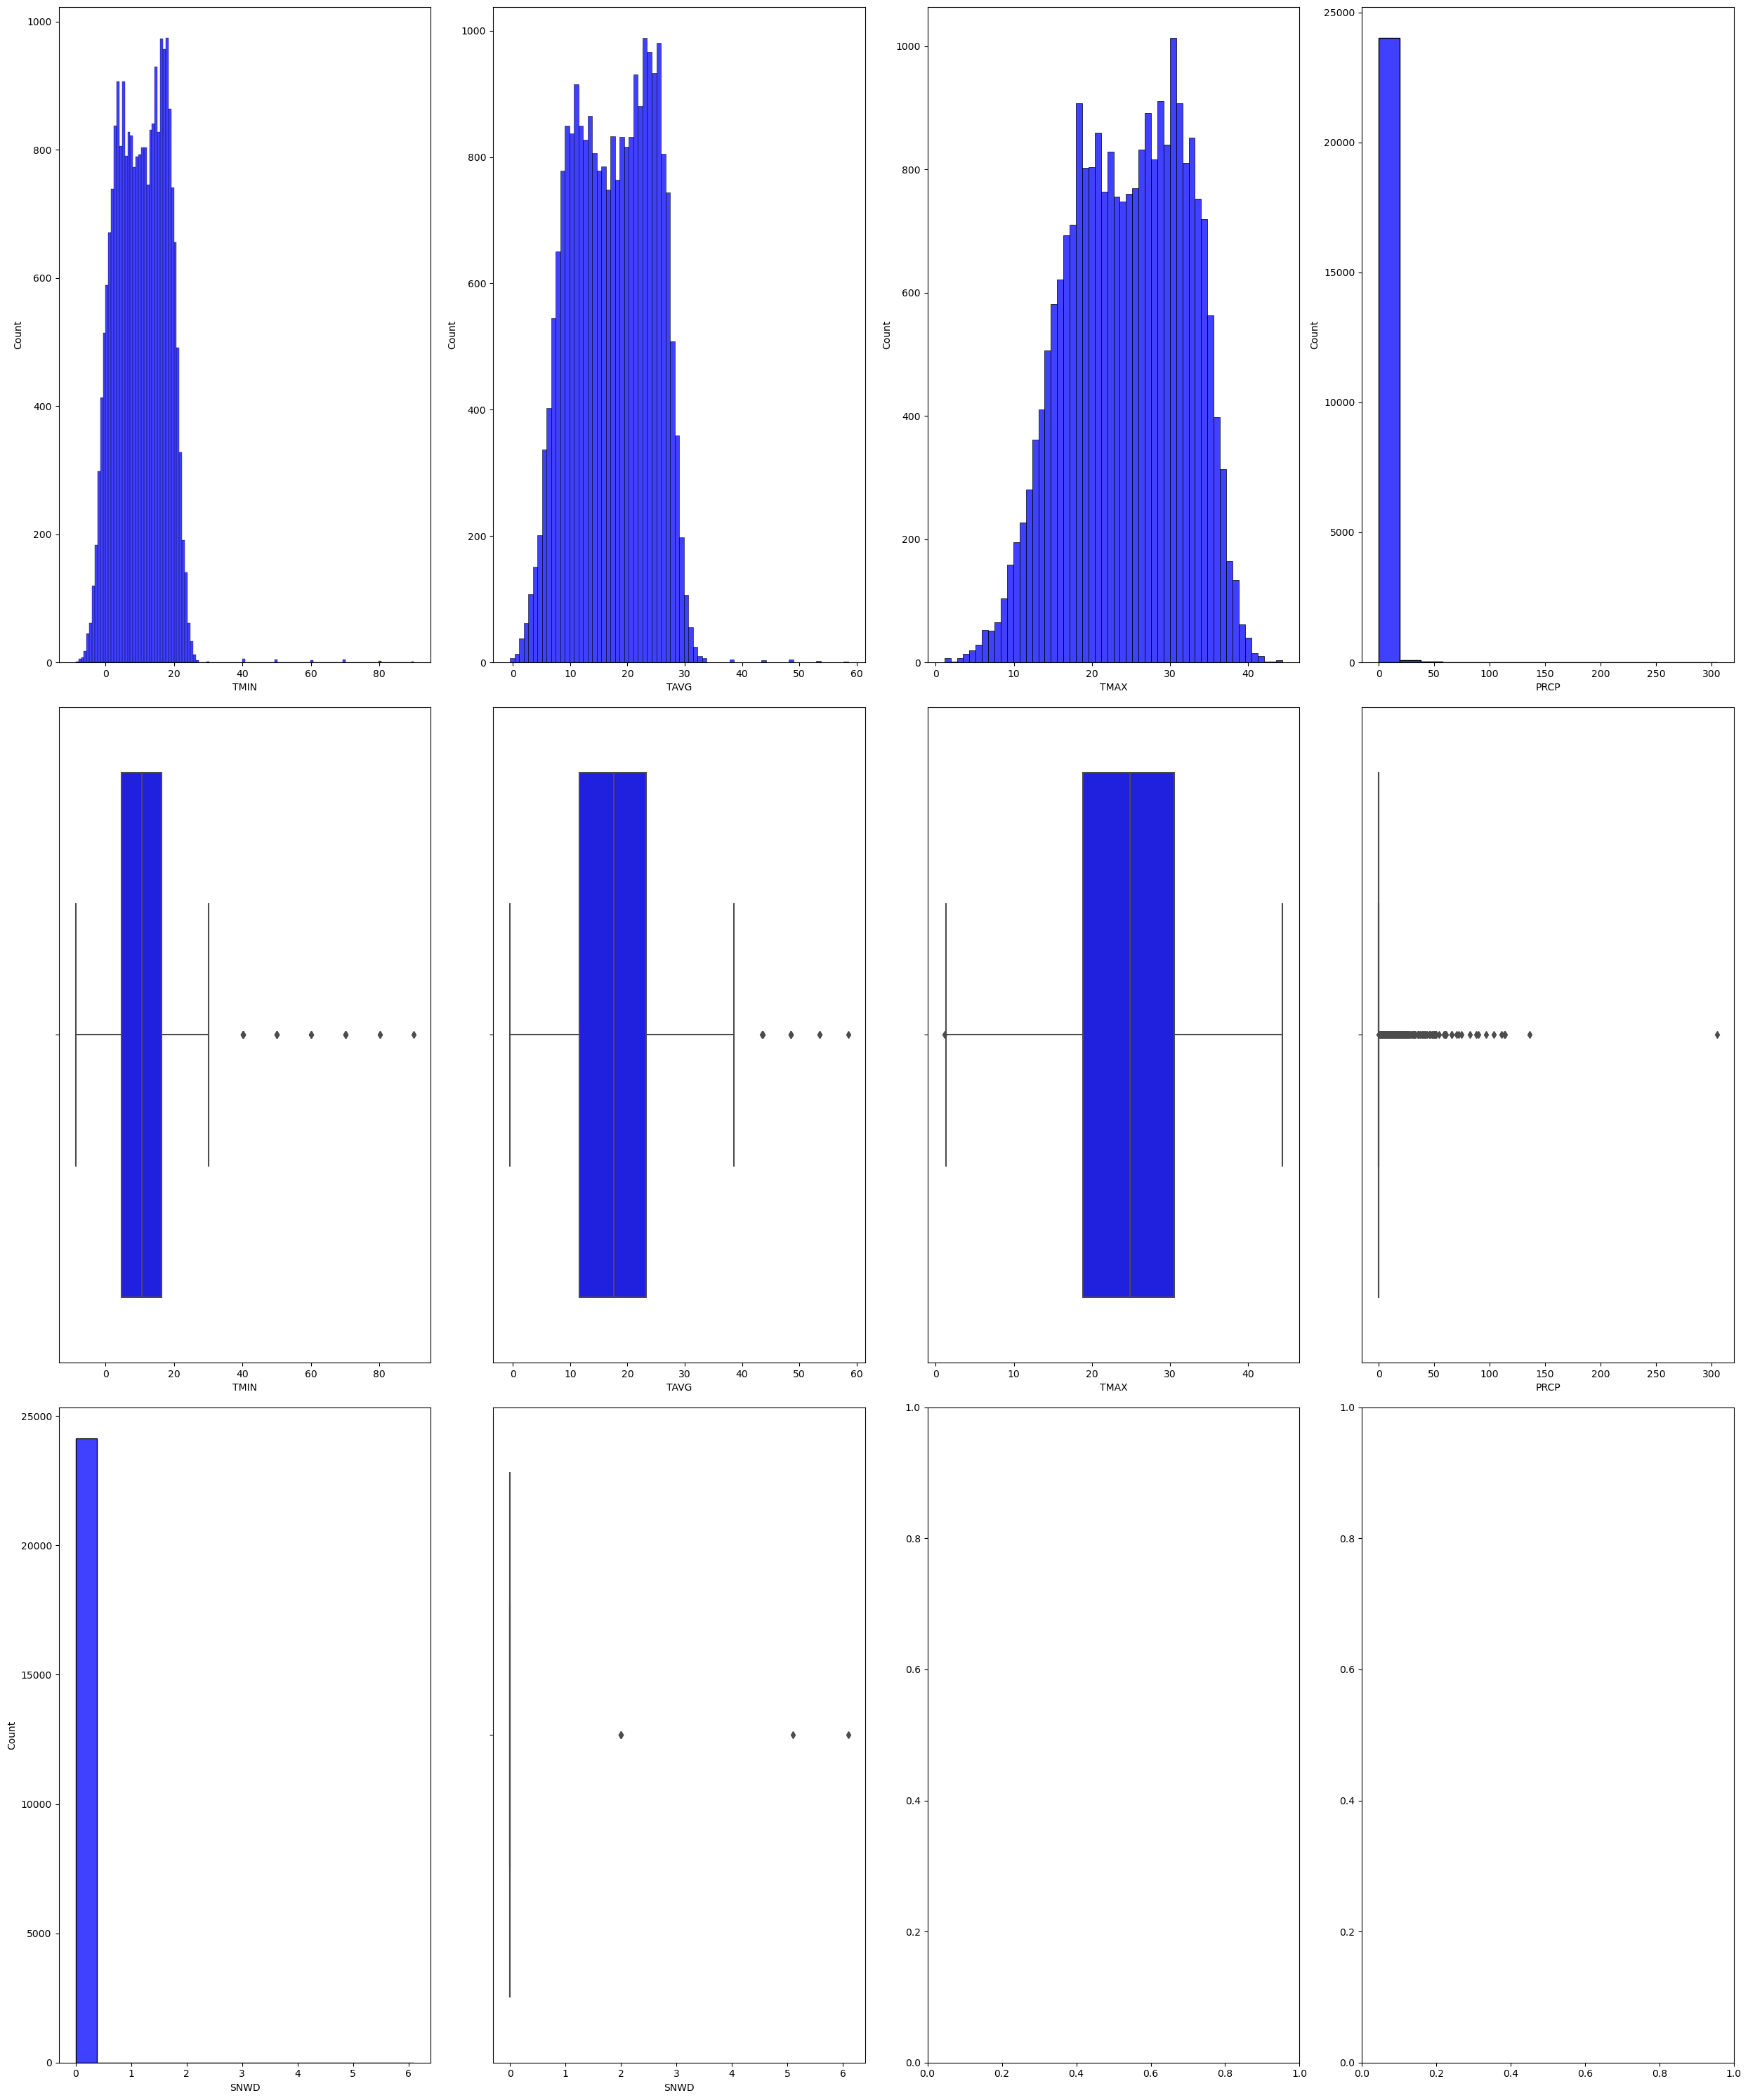

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 4, figsize=(25, 30))


# Histograma para 'TMIN'
sns.histplot(data = data, x = 'TMIN', ax=ax[0,0], color='blue')
# Boxplot para 'TMIN'
sns.boxplot(data = data, x = 'TMIN', ax=ax[1,0], color='blue')
# Histograma para 'TAVG'
sns.histplot(data = data, x = 'TAVG', ax=ax[0,1], color='blue')
# Boxplot para 'TAVG'
sns.boxplot(data = data, x = 'TAVG', ax=ax[1,1], color='blue')
# Histograma para 'TMAX'
sns.histplot(data = data, x = 'TMAX', ax=ax[0,2], color='blue')
# Boxplot para 'TMAX'
sns.boxplot(data = data, x = 'TMAX', ax=ax[1,2], color='blue')
# Histograma para 'PRCP'
sns.histplot(data = data, x = 'PRCP', ax=ax[0,3], color='blue')
# Boxplot para 'PRCP'
sns.boxplot(data = data, x = 'PRCP', ax=ax[1,3], color='blue')
# Histograma para 'SNWD'
sns.histplot(data = data, x = 'SNWD', ax=ax[2,0], color='blue')
# Boxplot para 'SNWD'
sns.boxplot(data = data, x = 'SNWD', ax=ax[2,1], color='blue')

plt.tight_layout()
plt.show()

In [9]:
data.drop(columns=['STATION', 'NAME'], inplace=True)

<Axes: >

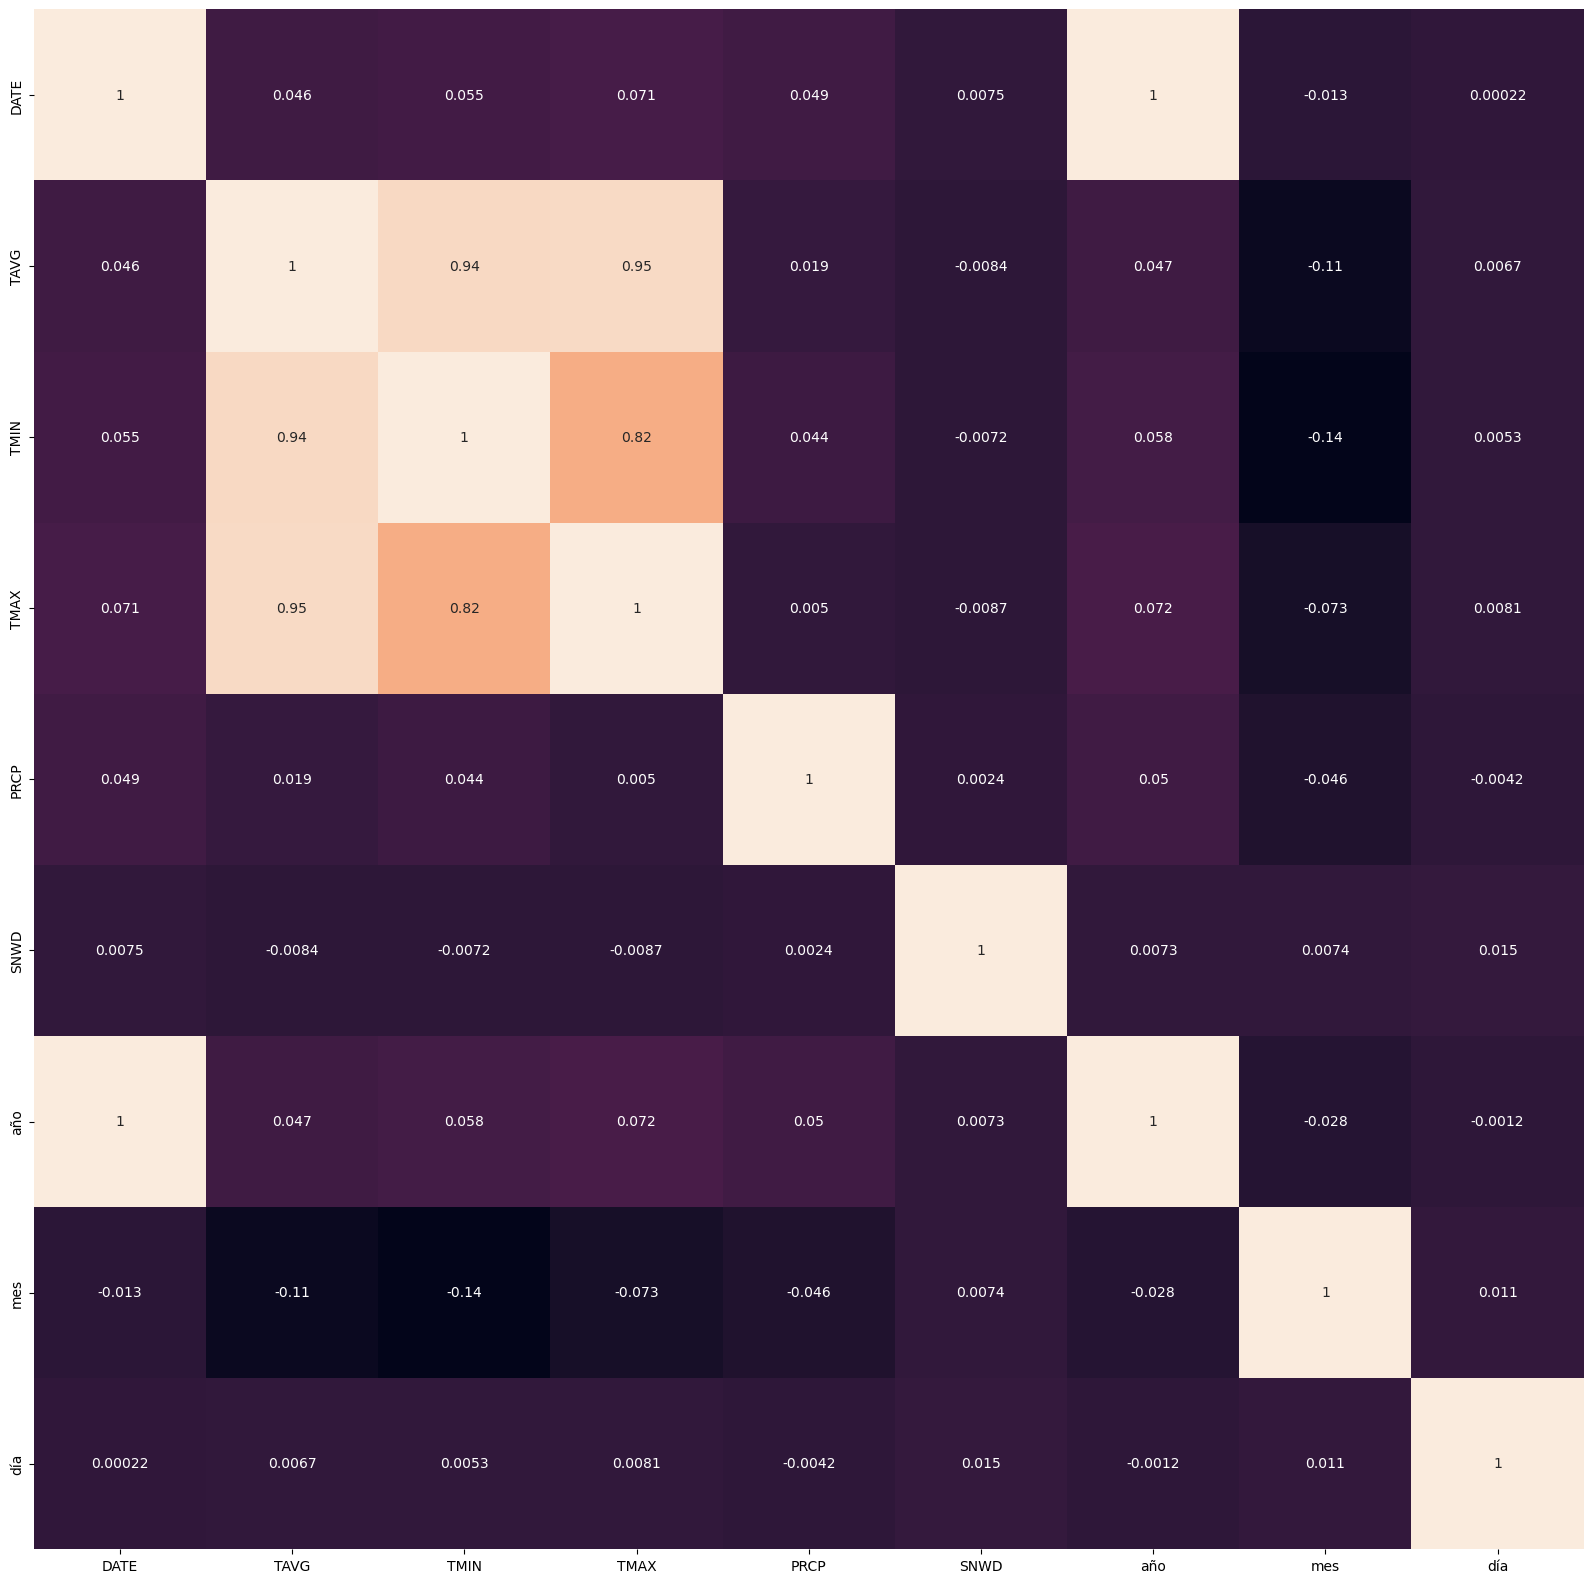

In [10]:
#Mapa de correlacion
plt.figure(figsize = (20, 20))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True, cbar = False)

c:\Users\fevc_\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


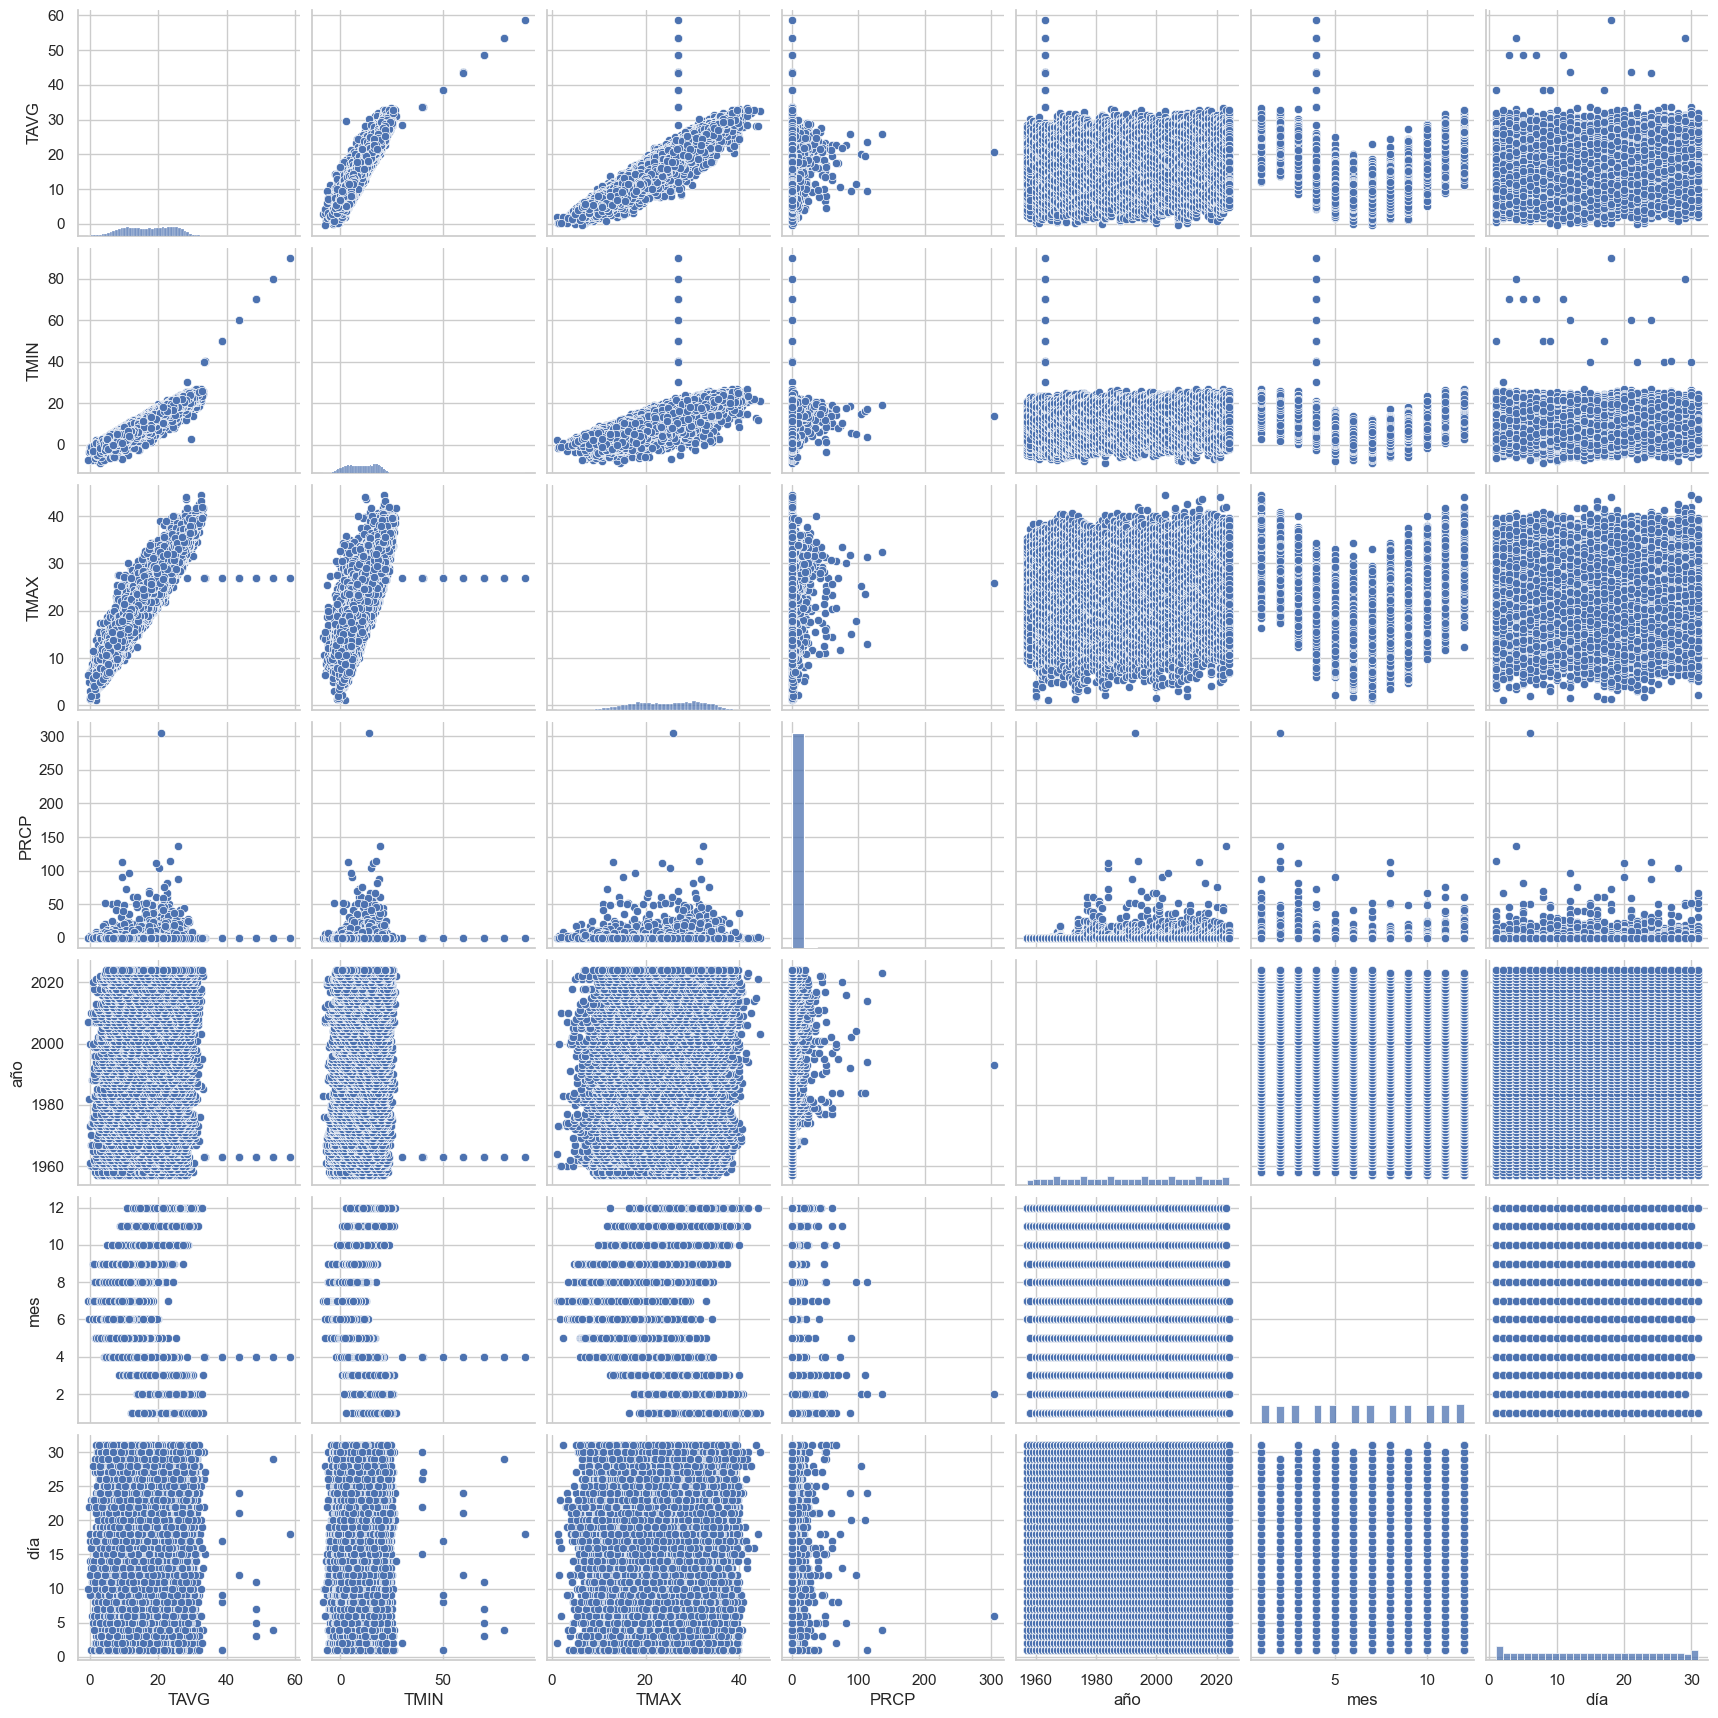

In [11]:
#Graficas de Correlacion
sns.set(style='whitegrid', context='notebook')
cols = ['TAVG','TMIN','TMAX','PRCP','año','mes','día']
sns.pairplot(data[cols], height=2.5)
plt.show()